Generate polynomial features and plot score vs degree

In [42]:
import pandas as pd
df_housing = pd.read_csv('Housing.csv')

In [43]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [45]:
df_housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [46]:
df_housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
df = df_housing[['price', 'area']]

In [84]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 10)

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train))
df_test = pd.DataFrame(scaler.fit_transform(df_test))

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [104]:
score = pd.DataFrame(columns=['train','test'])
for i in range(1,11):
    pipe = make_pipeline(PolynomialFeatures(i), LinearRegression())
    pipe.fit(df_train[[1]], df_train[[0]])
    y_pred = pipe.predict(df_test[[1]])
    score.loc[i] = [mean_squared_error(df_train[[0]], pipe.predict(df_train[[1]])), mean_squared_error(df_test[[0]], y_pred)]

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

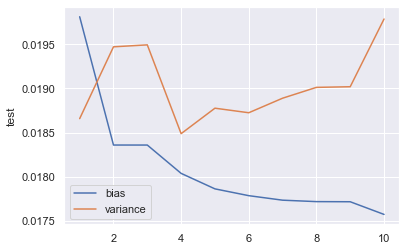

In [118]:
sns.lineplot(x=score.index, y=score['train'], label='bias')
sns.lineplot(x=score.index, y=score['test'], label='variance')